# Exploring CalEnviroScreen data

Here, I'm exploring data from the California Communities Environmental Health Screening Tool (CalEnviroScreen). CalEnviroScreen "identifies California communities by census tract that are disproportionately burdened by, and vulnerable to, multiple sources of pollution." It assigns communities a CES Score of 0-100, where 100 is highly burdened/vulnerable. I downloaded this dataset for my final project.

Import geopandas library, then import data

In [7]:
import pandas as gpd
enviro = gpd.read_csv("ces3results.csv")

I've imported the geopandas library and told it to read the data file

Check data type

In [9]:
type(enviro)

pandas.core.frame.DataFrame

This tells us the data is a pandas dataframe

Explore the data using a few commands

In [10]:
enviro.head

<bound method NDFrame.head of       Census Tract  Total Population California County    ZIP  \
0       6019001100              3174           Fresno   93706   
1       6071001600              6133    San Bernardino  91761   
2       6019000200              3167           Fresno   93706   
3       6077000801              6692       San Joaquin  95203   
4       6019001500              2206           Fresno   93725   
...            ...               ...               ...    ...   
8030    6009000504               942        Calaveras   95223   
8031    6065940100               166        Riverside   92239   
8032    6053011502              1710         Monterey   93923   
8033    6083980100                11     Santa Barbara     57   
8034    6111980000                56          Ventura      61   

     Nearby City \n(to help approximate location only)   Longitude   Latitude  \
0                                               Fresno -119.781696  36.709695   
1                          

I'm looking at the first 5 rows of the data. It's too large to view in this window (I didn't realize how many columns/rows there were--yikes!)

It looks like there are 8035 rows and 57 colums, but just to confirm...

In [11]:
enviro.shape

(8035, 57)

Okay I guess that was correct. Now I want to see the names of all 57 columns

In [12]:
enviro.columns.to_list()

['Census Tract',
 'Total Population',
 'California County',
 'ZIP',
 'Nearby City \n(to help approximate location only)',
 'Longitude',
 'Latitude',
 'CES 3.0 Score',
 ' CES 3.0 Percentile',
 'CES 3.0 \nPercentile Range',
 'SB 535 Disadvantaged Community',
 'Ozone',
 'Ozone Pctl',
 'PM2.5',
 'PM2.5 Pctl',
 'Diesel PM',
 'Diesel PM Pctl',
 'Drinking Water',
 'Drinking Water Pctl',
 'Pesticides',
 'Pesticides Pctl',
 'Tox. Release',
 'Tox. Release Pctl',
 'Traffic',
 'Traffic Pctl',
 'Cleanup Sites',
 'Cleanup Sites Pctl',
 'Groundwater Threats',
 'Groundwater Threats Pctl',
 'Haz. Waste',
 'Haz. Waste Pctl',
 'Imp. Water Bodies',
 'Imp. Water Bodies Pctl',
 'Solid Waste',
 'Solid Waste Pctl',
 'Pollution Burden',
 'Pollution Burden Score',
 'Pollution Burden Pctl',
 'Asthma',
 'Asthma Pctl',
 'Low Birth Weight',
 'Low Birth Weight Pctl',
 'Cardiovascular Disease',
 'Cardiovascular Disease Pctl',
 'Education',
 'Education Pctl',
 'Linguistic Isolation',
 'Linguistic Isolation Pctl',
 'Po

I can see the names of all 57 columns. Neat! More exporation... I want to know the unemployment rate for some of the data.

In [14]:
enviro.Unemployment

0       17.6
1       12.3
2       16.1
3       19.6
4       18.6
        ... 
8030     NaN
8031     NaN
8032     NaN
8033     NaN
8034     NaN
Name: Unemployment, Length: 8035, dtype: float64

This tells me the unemployment rate for the first and last five locations in the data. It looks like the last five rows have no data.

I noticed that the Nearby City column actually has some extra text in it, so I'm renaming it

In [17]:
enviro.rename(columns = {'Nearby City \n(to help approximate location only)':'Nearby City'})

,Census Tract,Total Population,California County,ZIP,Nearby City,Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.09,100.00,95-100% (highest scores),...,77.51,76.3,97.12,17.6,91.72,26.0,79.40,92.12,9.55,99.70
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.68,99.99,95-100% (highest scores),...,96.25,72.5,94.63,12.3,71.82,34.1,93.75,87.44,9.07,98.11
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.97,99.97,95-100% (highest scores),...,78.39,86.8,99.56,16.1,87.98,40.1,97.85,94.58,9.81,99.99
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.49,99.96,95-100% (highest scores),...,75.14,61.3,85.57,19.6,94.97,21.1,63.54,86.70,8.99,97.72
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.03,99.95,95-100% (highest scores),...,73.72,66.4,90.23,18.6,93.65,28.1,83.98,80.08,8.30,92.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,6009000504,942,Calaveras,95223,Arnold,-120.211151,38.405130,NaN,NaN,NaN,...,NaN,24.7,35.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8031,6065940100,166,Riverside,92239,Desert Center,-114.475335,34.000183,NaN,NaN,NaN,...,NaN,21.0,28.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8032,6053011502,1710,Monterey,93923,Carmel,-121.735102,36.301079,NaN,NaN,NaN,...,10.76,29.0,43.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8033,6083980100,11,Santa Barbara,57,Channel Islands,-120.048221,33.948186,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
enviro.info

<bound method DataFrame.info of       Census Tract  Total Population California County    ZIP  \
0       6019001100              3174           Fresno   93706   
1       6071001600              6133    San Bernardino  91761   
2       6019000200              3167           Fresno   93706   
3       6077000801              6692       San Joaquin  95203   
4       6019001500              2206           Fresno   93725   
...            ...               ...               ...    ...   
8030    6009000504               942        Calaveras   95223   
8031    6065940100               166        Riverside   92239   
8032    6053011502              1710         Monterey   93923   
8033    6083980100                11     Santa Barbara     57   
8034    6111980000                56          Ventura      61   

     Nearby City \n(to help approximate location only)   Longitude   Latitude  \
0                                               Fresno -119.781696  36.709695   
1                        

This command gives me a concise look at some of the data. Because there are so many columns, it's incomplete

In [32]:
enviro['ZIP'].value_counts()

90044    26
91331    24
94558    23
91342    22
90201    22
         ..
95550     1
92278     1
93517     1
95570     1
93251     1
Name: ZIP, Length: 1355, dtype: int64

This tells me that the most common zip code in this dataframe is 90044.

I want to narrow my dataframe down to just a few columns

In [45]:
desired_columns = ['Census Tract', 'Total Population', 'California County', 'ZIP', 'CES 3.0 Score']

In [46]:
print(desired_columns)

['Census Tract', 'Total Population', 'California County', 'ZIP', 'CES 3.0 Score']


In [48]:
enviro_trim = enviro[desired_columns].copy()
enviro_trim

,Census Tract,Total Population,California County,ZIP,CES 3.0 Score
0,6019001100,3174,Fresno,93706,94.09
1,6071001600,6133,San Bernardino,91761,90.68
2,6019000200,3167,Fresno,93706,85.97
3,6077000801,6692,San Joaquin,95203,82.49
4,6019001500,2206,Fresno,93725,82.03
...,...,...,...,...,...
8030,6009000504,942,Calaveras,95223,NaN
8031,6065940100,166,Riverside,92239,NaN
8032,6053011502,1710,Monterey,93923,NaN
8033,6083980100,11,Santa Barbara,57,NaN


Now I have just five desired columns. I'll try a plot, but I don't think it'll be useful.

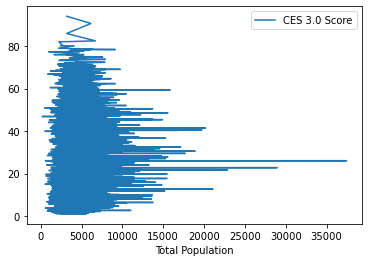

In [50]:
enviro_trim.plot('Total Population', 'CES 3.0 Score')

Here I plotted CES Score by population size. It's a little crowded, but it does seem to show that census tracts with larger populations tend to have lower CES scores.

Now I'm going to filter the data to look only at census tracts within my ZIP code (90046).

In [54]:
enviro_trim.query("ZIP=='90046'")

,Census Tract,Total Population,California County,ZIP,CES 3.0 Score
1997,6037700102,4061,Los Angeles,90046,39.25
2534,6037189902,4971,Los Angeles,90046,34.81
2684,6037700101,5232,Los Angeles,90046,33.66
3004,6037192001,2466,Los Angeles,90046,31.45
3107,6037189904,2260,Los Angeles,90046,30.68
3361,6037189905,2304,Los Angeles,90046,28.91
3943,6037189800,4021,Los Angeles,90046,25.17
4032,6037189903,2164,Los Angeles,90046,24.60
4210,6037700200,6321,Los Angeles,90046,23.73
5423,6037194401,2461,Los Angeles,90046,17.46


Predictably, West Hollywood has a low CES Score.